# Import and filter data

### Import

In [1]:
from astropy.io import fits

file_path = "/Users/ziqimu/Desktop/fastspec-iron.fits"

with fits.open(file_path) as hdul:
    hdul.info() 
    
    if isinstance(hdul[1], fits.BinTableHDU):
        columns_hdu1 = hdul[1].columns.names
        print("Columns in HDU 1:", columns_hdu1)

    if len(hdul) > 2 and isinstance(hdul[2], fits.BinTableHDU):
        columns_hdu2 = hdul[2].columns.names
        print("Columns in HDU 2:", columns_hdu2)


Filename: /Users/ziqimu/Desktop/fastspec-iron.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  FASTSPEC      1 BinTableHDU   1826   17995820R x 907C   [K, 7A, 6A, J, D, 40E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [2]:
with fits.open(file_path) as hdul:
    hdu1 = hdul[1]
    
    num_rows = len(hdu1.data)
    
    print(f"Number of rows in HDU1: {num_rows}")

Number of rows in HDU1: 17995820


In [3]:
with fits.open(file_path) as hdul:
    hdu2 = hdul[2]
    hdu1 = hdul[1]
    
    z_data = hdu2.data["Z"]
    Dec = hdu2.data["DEC"]
    Ra = hdu2.data["RA"]
    abs_magr_data = hdu1.data["ABSMAG01_SDSS_R"]
    abs_magu_data = hdu1.data["ABSMAG01_SDSS_U"]
    abs_magg_data = hdu1.data["ABSMAG01_SDSS_G"]
    logmstar_data = hdu1.data["LOGMSTAR"]
    halpha_data = hdu1.data["HALPHA_FLUX"]
    hbeta_data = hdu1.data["HBETA_FLUX"]
    sfr_data = hdu1.data["SFR"]  
    
    fiber_flux_g = hdu2.data["FIBERFLUX_G"]
    fiber_flux_r = hdu2.data["FIBERFLUX_R"]
    fiber_flux_z = hdu2.data["FIBERFLUX_Z"]
    flux_g = hdu2.data["FLUX_G"]
    flux_r = hdu2.data["FLUX_R"]
    flux_z = hdu2.data["FLUX_Z"]
    
    ew = hdu1.data["HALPHA_EW"]

### Redshift Z <= 0.12, apparent magnitude <= 17.8, and rows containing zero values are removed.

In [4]:
mask_z = z_data <= 0.12
filtered_z = z_data[mask_z]
filtered_dec = Dec[mask_z]
filtered_ra = Ra[mask_z]
filtered_abs_magr = abs_magr_data[mask_z]
filtered_abs_magu = abs_magu_data[mask_z]
filtered_abs_magg = abs_magg_data[mask_z]
filtered_logmstar = logmstar_data[mask_z]
filtered_halpha = halpha_data[mask_z]
filtered_hbeta = hbeta_data[mask_z]
filtered_sfr = sfr_data[mask_z]

filtered_fiber_flux_g = fiber_flux_g[mask_z]
filtered_fiber_flux_r = fiber_flux_r[mask_z]
filtered_fiber_flux_z = fiber_flux_z[mask_z]
filtered_flux_g = flux_g[mask_z]
filtered_flux_r = flux_r[mask_z]
filtered_flux_z = flux_z[mask_z]

filtered_ew = ew[mask_z]



In [5]:
print(f"Number of rows after filtering: {len(filtered_abs_magr)}")
print(len(filtered_flux_r),len(filtered_ra), len(filtered_dec) )

print(min(filtered_abs_magr), max(filtered_abs_magr))

Number of rows after filtering: 1415251
1415251 1415251 1415251
-23.773144 5.039431


In [6]:
# calculate the apparent magnitude

import numpy as np
c = 3 * 10**5  
H0 = 100     
pc_to_mpc = 10**-6 

apparent_magnitude = (
    filtered_abs_magr + 
    5 * np.log10(filtered_z * c / H0 / (10 * pc_to_mpc))
)

In [7]:
mask_magnitude = apparent_magnitude <= 17.8  #remove rows when apparent magnitude > 17.8
mask_valid_halpha_hbeta = (filtered_halpha != 0) & (filtered_hbeta != 0)  #remove rows when H_alpha and H_beta = 0
mask_magnitude = mask_magnitude & mask_valid_halpha_hbeta

final_filtered_z = filtered_z[mask_magnitude]
final_filtered_dec = filtered_dec[mask_magnitude]
final_filtered_ra = filtered_ra[mask_magnitude]
final_filtered_abs_magr = filtered_abs_magr[mask_magnitude]
final_filtered_abs_magu = filtered_abs_magu[mask_magnitude]
final_filtered_abs_magg = filtered_abs_magg[mask_magnitude]
final_filtered_logmstar = filtered_logmstar[mask_magnitude]
final_filtered_halpha = filtered_halpha[mask_magnitude]
final_filtered_hbeta = filtered_hbeta[mask_magnitude]
final_filtered_sfr = filtered_sfr[mask_magnitude]
final_filtered_apparent_magnitude = apparent_magnitude[mask_magnitude]

final_filtered_fiber_flux_g = filtered_fiber_flux_g[mask_magnitude]
final_filtered_fiber_flux_r = filtered_fiber_flux_r[mask_magnitude]
final_filtered_fiber_flux_z = filtered_fiber_flux_z[mask_magnitude]
final_filtered_flux_g = filtered_flux_g[mask_magnitude]
final_filtered_flux_r = filtered_flux_r[mask_magnitude]
final_filtered_flux_z = filtered_flux_z[mask_magnitude]

final_filtered_ew = filtered_ew[mask_magnitude]

In [8]:
print(len(final_filtered_flux_g), len(final_filtered_flux_r))


295707 295707


In [9]:
print("Shape of final_filtered_fiber_flux_g:", final_filtered_fiber_flux_g.shape)
print("Shape of final_filtered_fiber_flux_r:", final_filtered_fiber_flux_r.shape)
print("Shape of final_filtered_fiber_flux_z:", final_filtered_fiber_flux_z.shape)
print("Shape of final_filtered_flux_g:", final_filtered_flux_g.shape)
print("Shape of final_filtered_flux_r:", final_filtered_flux_r.shape)
print("Shape of final_filtered_flux_z:", final_filtered_flux_z.shape)
print("Shape of final_filtered_z:", final_filtered_z.shape)

# remove cases when total flux and fiber flux = 0 and nan
valid_mask = (~np.isnan(final_filtered_fiber_flux_g) & (final_filtered_fiber_flux_g != 0) &
              ~np.isnan(final_filtered_fiber_flux_r) & (final_filtered_fiber_flux_r != 0) &
              ~np.isnan(final_filtered_fiber_flux_z) & (final_filtered_fiber_flux_z != 0) &
              ~np.isnan(final_filtered_flux_g) & (final_filtered_flux_g != 0) &
              ~np.isnan(final_filtered_flux_r) & (final_filtered_flux_r != 0) &
              ~np.isnan(final_filtered_flux_z) & (final_filtered_flux_z != 0))

final_filtered_z = final_filtered_z[valid_mask]
final_filtered_dec = final_filtered_dec[valid_mask]
final_filtered_ra = final_filtered_ra[valid_mask]
final_filtered_abs_magr = final_filtered_abs_magr[valid_mask]
final_filtered_abs_magu = final_filtered_abs_magu[valid_mask]
final_filtered_abs_magg = final_filtered_abs_magg[valid_mask]
final_filtered_logmstar = final_filtered_logmstar[valid_mask]
final_filtered_halpha = final_filtered_halpha[valid_mask]
final_filtered_hbeta = final_filtered_hbeta[valid_mask]
final_filtered_sfr = final_filtered_sfr[valid_mask]
final_filtered_apparent_magnitude = final_filtered_apparent_magnitude[valid_mask]

final_filtered_fiber_flux_g = final_filtered_fiber_flux_g[valid_mask]
final_filtered_fiber_flux_r = final_filtered_fiber_flux_r[valid_mask]
final_filtered_fiber_flux_z = final_filtered_fiber_flux_z[valid_mask]
final_filtered_flux_g = final_filtered_flux_g[valid_mask]
final_filtered_flux_r = final_filtered_flux_r[valid_mask]
final_filtered_flux_z = final_filtered_flux_z[valid_mask]

final_filtered_ew2 = final_filtered_ew[valid_mask]

Shape of final_filtered_fiber_flux_g: (295707,)
Shape of final_filtered_fiber_flux_r: (295707,)
Shape of final_filtered_fiber_flux_z: (295707,)
Shape of final_filtered_flux_g: (295707,)
Shape of final_filtered_flux_r: (295707,)
Shape of final_filtered_flux_z: (295707,)
Shape of final_filtered_z: (295707,)


In [10]:
print(len(final_filtered_apparent_magnitude), len(final_filtered_sfr), len(final_filtered_dec))


294111 294111 294111


# Histograms 

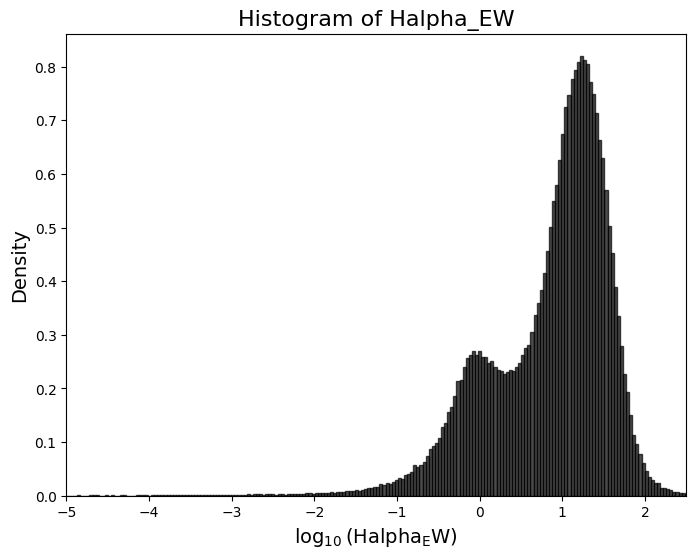

In [17]:
import matplotlib.pyplot as plt

filtered_values = final_filtered_ew2[final_filtered_ew2 > 0]  # Ensure values > 0 for log10
log_values = np.log10(filtered_values)

plt.figure(figsize=(8, 6))
plt.hist(log_values, bins=500, density=True, alpha=0.7, color='black', edgecolor='black')

plt.xlabel(r"$\log_{10}(\mathrm{Halpha_EW})$", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of Halpha_EW", fontsize=16)
plt.xlim(-5, 2.5)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

data_dict = {
    "ABSMAG01_SDSS_R": final_filtered_abs_magr,
    "LOGMSTAR": final_filtered_logmstar,
}

for label, data in data_dict.items():
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins = 500, edgecolor="k", alpha=0.7)
    plt.title(f"Histogram of {label}", fontsize=16)
    plt.xlabel(label, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:

color_ur = final_filtered_abs_magu - final_filtered_abs_magr
color_gr = final_filtered_abs_magg - final_filtered_abs_magr

plt.figure(figsize=(8, 5))
plt.hist(color_ur, bins=500, edgecolor="k", alpha=0.7, color='blue')
plt.title("Histogram of Color (u-r)", fontsize=16)
plt.xlabel("u - r", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(0,4)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(color_gr, bins=500, edgecolor="k", alpha=0.7, color='blue')
plt.title("Histogram of Color (g-r)", fontsize=16)
plt.xlabel("g - r", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.show()

In [ ]:
#histogram of SFR in Fastspecfit

print("number of zero SFR values is", len(final_filtered_sfr[final_filtered_sfr == 0]
))

small_value = 1e-10


log_sfr = np.log10(np.where(final_filtered_sfr > 0, final_filtered_sfr, small_value))
log_sfr[final_filtered_sfr == 0] = np.nan 

plt.figure(figsize=(8, 5))
plt.hist(log_sfr, bins=1000, edgecolor="k", alpha=0.7)
plt.title("Histogram of log10(SFR) (Filtered Data)", fontsize=16)
plt.xlabel("log10(SFR)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)

plt.show()

print(len(log_sfr))

# Calculat SFR using H_alpha flux

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "log10(SFR)": log_sfr
})


print("\nFirst 10 log10(SFR) values in Fastspecfit:")
print(df["log10(SFR)"].head(10).to_list())

## Calculate SFR before applying the Hα luminosity correction

In [ ]:
# Calculate luminosity distance DL

m = final_filtered_apparent_magnitude  # Apparent magnitude
M = final_filtered_abs_magr  # Absolute magnitude (R-band)

D_L = 10 ** (((m - M) / 5) + 1)  # in parsecs

D_L = D_L * 3.0857e18    # in cm

print("First 10 computed D_L values:")
print(D_L[:10])

print(min(D_L), max(D_L))

In [ ]:
#calculate H_alpha/H_beta

#1e-17 erg / (cm2 s)

print(final_filtered_halpha[:10])
print(final_filtered_hbeta[:10])

adjusted_halpha = final_filtered_halpha * 10**-17
adjusted_hbeta = final_filtered_hbeta * 10**-17

print(min(adjusted_halpha), max(adjusted_halpha))

print("range of ratio Halpha/Hbeta is:", min(adjusted_halpha / adjusted_hbeta), max(adjusted_halpha / adjusted_hbeta))

Halpha_Hbeta = adjusted_halpha / adjusted_hbeta

plt.figure(figsize=(8, 5))
plt.hist(Halpha_Hbeta, bins=500, range=(0, 10), edgecolor="black", alpha=0.7)
plt.xlabel("Hα / Hβ Ratio", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Hα / Hβ Ratio", fontsize=16)
plt.grid(alpha=0.3)
plt.show()

In [ ]:


A_Halpha = np.maximum(5.91 * np.log10(Halpha_Hbeta) - 2.70, 0)

f_Halpha = adjusted_halpha * 10 ** (A_Halpha / 2.5)  #erg/s/cm²

L_Halpha = 4 * np.pi * (D_L ** 2) * f_Halpha  # Luminosity in erg/s

SFR = 7.9 * 10 ** (-41.28) * L_Halpha  # SFR in solar masses per year

print("First 10 values of A_Hα after filtering:")
print(A_Halpha[:10])

print("\nFirst 10 corrected Hα flux values (f_Hα) after filtering:")
print(f_Halpha[:10])

print("\nFirst 10 values of L_Hα (Hα Luminosity) after filtering:")
print(L_Halpha[:10])

print("\nFirst 10 values of SFR (M☉/yr) after filtering:")
print(SFR[:10])

# Didn't apply the Hα luminosity correction on L_Halpha 

In [ ]:
print(f"number of calculated SFR: {len(SFR)}")
print("range of calculated SFR:", max(SFR), min(SFR))

In [ ]:
#Histogram of calculated SFR before applying the Hα luminosity correction

valid_SFR = SFR[SFR > 0]   #remove cases when SFR <= 0 

log10_SFR = np.log10(valid_SFR)
print(max(log10_SFR), min(log10_SFR))

plt.figure(figsize=(8, 5))
plt.hist(log10_SFR, bins=1500, edgecolor="k", alpha=0.7)
plt.title("Histogram of log10(SFR) before applying the Hα luminosity correction", fontsize=16)
plt.xlabel("log10(SFR) [M☉/yr]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-5, 5)
plt.show()

print(len(log10_SFR))

In [ ]:
print(f"number of fiber: {len(final_filtered_fiber_flux_g)}")

## Calculate SFR after applying the Hα luminosity correction

In [ ]:
correction_g = final_filtered_flux_g / final_filtered_fiber_flux_g  #total flux/ fiber flux
correction_r = final_filtered_flux_r / final_filtered_fiber_flux_r
correction_z = final_filtered_flux_z / final_filtered_fiber_flux_z

range_g = (np.min(correction_g), np.max(correction_g))
range_r = (np.min(correction_r), np.max(correction_r))
range_z = (np.min(correction_z), np.max(correction_z))

print(range_g, range_r, range_z)

#Since the range of correction factors are large, I took the log_10 of them.
log_correction_g = np.log10(correction_g)
log_correction_r = np.log10(correction_r)
log_correction_z = np.log10(correction_z)

range_log_g = (np.min(log_correction_g), np.max(log_correction_g))
range_log_r = (np.min(log_correction_r), np.max(log_correction_r))
range_log_z = (np.min(log_correction_z), np.max(log_correction_z))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


bin = 500

axes[0].hist(log_correction_g, bins=bin, color='g', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Log10 Correction Factor (g-band)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Range: {range_log_g}', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].hist(log_correction_r, bins=bin, color='r', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Log10 Correction Factor (r-band)', fontsize=12)
axes[1].set_title(f'Range: {range_log_r}', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)

axes[2].hist(log_correction_z, bins=bin, color='b', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Log10 Correction Factor (z-band)', fontsize=12)
axes[2].set_title(f'Range: {range_log_z}', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


(range_log_g, range_log_r, range_log_z)

In [ ]:
#Histograms of SFR after correction

SFR_g = 7.9 * 10**(-41.28) * L_Halpha * correction_g
SFR_r = 7.9 * 10**(-41.28) * L_Halpha * correction_r
SFR_z = 7.9 * 10**(-41.28) * L_Halpha * correction_z

print(max(SFR_g), min(SFR_g))

valid_SFR_g = SFR_g[SFR_g > 0]
valid_SFR_r = SFR_r[SFR_r > 0]
valid_SFR_z = SFR_z[SFR_z > 0]


log10_SFR_g = np.log10(valid_SFR_g)
log10_SFR_r = np.log10(valid_SFR_r)
log10_SFR_z = np.log10(valid_SFR_z)

print(len(log10_SFR_g))

plt.figure(figsize=(8, 5))
plt.hist(log10_SFR_g, bins=1000, alpha=0.7, edgecolor="k", color="blue")
plt.title("Histogram of log10(SFR) (G-band Correction)", fontsize=16)
plt.xlabel("log10(SFR) [M☉/yr]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-6, 10)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(log10_SFR_r, bins=1000, alpha=0.7, edgecolor="k", color="red")
plt.title("Histogram of log10(SFR) (R-band Correction)", fontsize=16)
plt.xlabel("log10(SFR) [M☉/yr]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-6, 10)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(log10_SFR_z, bins=1000, alpha=0.7, edgecolor="k", color="green")
plt.title("Histogram of log10(SFR) (Z-band Correction)", fontsize=16)
plt.xlabel("log10(SFR) [M☉/yr]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-6, 10)
plt.show()

In [ ]:
bins = np.linspace(-6, 6, 300)

plt.figure(figsize=(8, 5))

plt.hist(log_sfr, bins=bins, alpha=0.5, edgecolor="k", color="purple", label="SFR in FastSpecfit")

plt.hist(log10_SFR_z, bins=bins, alpha=0.5, edgecolor="k", color="green", label="Calculated SFR after Z-band Correction")


plt.title("Comparison of log10(SFR) Histograms", fontsize=16)
plt.xlabel("log10(SFR) [M☉/yr]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-6, 6)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(log_sfr, log10_SFR_r, s = 5, alpha=0.17, edgecolor='black')

plt.xlabel("log10(SFR) from FastSpefit", fontsize=12)
plt.ylabel("log10(SFR) from my calculated value", fontsize=12)
plt.title("Scatter Plot of log10(SFR) from Two Sources", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.show()

In [ ]:
import seaborn as sns

print("range of color g-r is:", min(color_gr), max(color_gr))


#Color (g-r) vs FastSpefit SFR
df = pd.DataFrame({
    'log10_SFR_r': log_sfr,
    'color_gr': color_gr
})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, s = 5, x='log10_SFR_r', y='color_gr', edgecolor=None, alpha=0.2)
plt.title("Color (g-r) vs FastSpefit SFR")
plt.xlabel("log10(SFR_r) (low to high)")
plt.ylabel("Color (g-r) (blue to red)")

plt.show()


#Color (g-r) vs my calaulated SFR
df = pd.DataFrame({
    'log10_SFR_r': log10_SFR_r,
    'color_gr': color_gr
})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, s = 5, x='log10_SFR_r', y='color_gr', edgecolor=None, alpha=0.2)
plt.title("Color (g-r) vs Calculated SFR")
plt.xlabel("log10(SFR_r) (low to high)")
plt.ylabel("Color (g-r) (blue to red)")
plt.show()

In [ ]:
import os
from astropy.io import fits
import numpy as np

# Get the Desktop path dynamically
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
output_filename = os.path.join(desktop_path, "filtered_data.fits")


# Create a dictionary to store the filtered variables
filtered_data = {
    "Z": final_filtered_z,
    "DEC": final_filtered_dec,
    "RA": final_filtered_ra,
    "ABS_MAG_R": final_filtered_abs_magr,
    "ABS_MAG_U": final_filtered_abs_magu,
    "ABS_MAG_G": final_filtered_abs_magg,
    "LOG_MSTAR": final_filtered_logmstar,
    "HALPHA": final_filtered_halpha,
    "HBETA": final_filtered_hbeta,
    "SFR": final_filtered_sfr,
    "APP_MAG": final_filtered_apparent_magnitude,
    "FIBER_FLUX_G": final_filtered_fiber_flux_g,
    "FIBER_FLUX_R": final_filtered_fiber_flux_r,
    "FIBER_FLUX_Z": final_filtered_fiber_flux_z,
    "FLUX_G": final_filtered_flux_g,
    "FLUX_R": final_filtered_flux_r,
    "FLUX_Z": final_filtered_flux_z,
    "Color_ur": color_ur,
    "Color_gr": color_gr
}

# Convert the dictionary into a FITS table
columns = [fits.Column(name=key, format="E", array=np.array(value)) for key, value in filtered_data.items()]
hdu = fits.BinTableHDU.from_columns(columns)

# Save the file to Desktop
hdu.writeto(output_filename, overwrite=True)

print(f"Filtered data successfully saved to: {output_filename}")